In [1]:
from funcs.notebook import *

In [2]:
df = pd.read_csv("../results/2021_03_star_planet_systems_with_flares.csv")
df = df[df.discoverymethod == "RV"].set_index("ID")
df

,discoverymethod,binary,SpT1,SpT2,flaring_component,ref1,ref1_note,nplanets,nplanets_ref,innermost_planet,...,periastron_longitude_deg,periastron_longitude_deg_err_up,periastron_longitude_deg_err_low,planet_eccen,planet_eccen_err_up,planet_eccen_err_low,ref_eccen,eccen_note,note,RV_data_link
ID,,,,,,,,,,,,,,,,,,,,,
YZ Cet,RV,NaN,NaN,NaN,NaN,NaN,NaN,3.0,Stock2020,NaN,...,197.000000,110.000000,133.000000,0.060,0.060,0.040,Stock2020,using stable run c in Table 8 as preferred by ...,NaN,NaN
HD 147379,RV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,93.000000,111.000000,122.000000,0.010,0.120,0.010,Reiners2018,what does M stand for in the Keplerian solution,NaN,NaN
GJ 163,RV,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,70.702992,54.602878,54.602878,0.073,0.050,0.050,Bonfils2013,NaN,NaN,NaN
GJ 1265,RV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,282.000000,72.000000,-72.000000,0.040,0.040,0.040,Luque2018,mean anomaly given at first epoch of observation,NaN,https://vizier.u-strasbg.fr/viz-bin/VizieR?-so...
GJ 687,RV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,117.000000,19.000000,19.000000,0.170,0.050,0.050,Feng2020b,NaN,NaN,NaN
GJ 3634,RV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,84.000000,52.000000,130.000000,0.080,0.057,0.057,Bonfils2011,NaN,NaN,NaN
GJ 832,RV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c,...,10.000000,47.000000,47.000000,0.180,0.130,0.130,Wittenmyer2014,tperiastron from mean anomaly at offset,NaN,NaN
GJ 682,RV,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,b,...,85.943669,NaN,NaN,0.080,0.190,0.080,Tuomi2014,tperiastron from mean anomaly at offset,NaN,NaN
GJ 273,RV,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,c,...,NaN,NaN,NaN,0.170,0.130,0.120,Astudillodefru2017,could not figure out parameters,NaN,NaN


Text(0.5, 1.0, 'Eccentricities of planets\nin RV detected flaring systems')

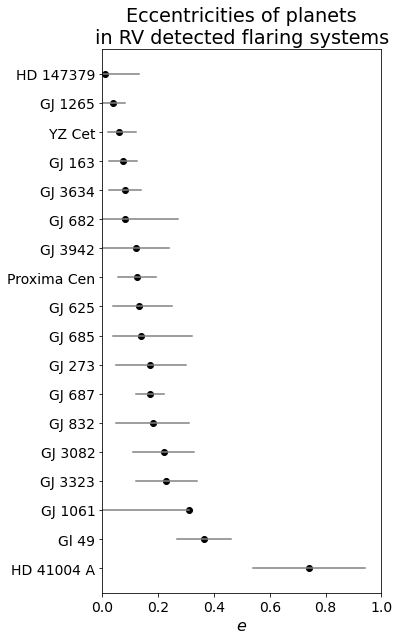

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,10))
df = df.sort_values(by="planet_eccen", ascending=False)
ax.scatter(y=df.index,x=df.planet_eccen,c="k")
for label, row in df.iterrows():
    ax.plot([row["planet_eccen"]-row["planet_eccen_err_low"],
             row["planet_eccen"]+row["planet_eccen_err_up"]], 
            [label, label], c="grey")#yerr=df[["planet_b_eccen_err_up", "planet_b_eccen_err_low"]].values)
plt.xlim(0,1)
plt.xlabel(r"$e$")
plt.title("Eccentricities of planets\nin RV detected flaring systems")

# Get phases

In [4]:
def calculate_phase(t, tperi, P, e, omega):
    M = 2 * np.pi * (t - tperi) / P
    
    # Taylor expansion
    M1 = (2 * e - .25 * e**3) * np.sin(M)
    M2 = 1.25 * e**2 * np.sin(2 * M)
    M3 = 13 / 12 * e**3 * np.sin(3 * M) 
    
    return (M + M1 + M2 + M3 + omega) % (2 * np.pi) / (2 * np.pi)

    
offset = {#"K2":2454833.,
          "Kepler":2454833.,
          "TESS":2457000., 
          }    

obsdurs = pd.read_csv("../results/2020_02_obsdurs.csv")

In [5]:
obsdurs.head()

,ID,qcs,lc_n,datapoints,mission,total_available_lcs
0,GJ 1132,9,0,15616,TESS,2
1,GJ 1132,10,0,15290,TESS,2
2,HATS-68,28,0,88067,TESS,2
3,HATS-68,29,0,88813,TESS,2
4,HD 15337,3,0,13095,TESS,3


HD 41004 A
HD 41004 A
HD 41004 A
Gl 49
Gl 49
GJ 1061
GJ 1061
GJ 1061
GJ 1061
GJ 3323
GJ 3082
GJ 3082
GJ 832
GJ 832
GJ 832
GJ 687
GJ 687
GJ 687
GJ 687
GJ 687
GJ 687
GJ 687
GJ 687
GJ 687
GJ 687
GJ 687
GJ 273
GJ 685
GJ 685
GJ 685
GJ 685
GJ 685
GJ 685
GJ 685
GJ 685
GJ 685
GJ 685
GJ 685
GJ 685
GJ 685
GJ 625
GJ 625
GJ 625
Proxima Cen
Proxima Cen
GJ 3942
GJ 682
GJ 3634
GJ 163
GJ 163
GJ 163
GJ 163
GJ 163
YZ Cet
YZ Cet
GJ 1265
HD 147379
HD 147379
HD 147379
HD 147379
HD 147379
HD 147379
HD 147379
HD 147379
HD 147379
HD 147379
HD 147379
HD 147379


Text(0, 0.5, 'orbital phase with offset')

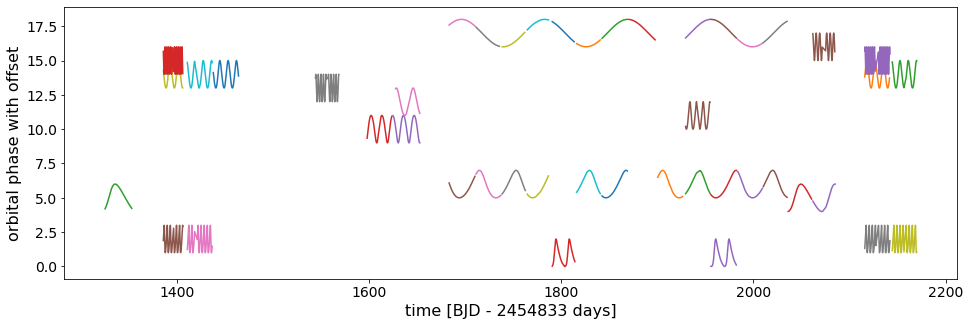

In [6]:
plt.figure(figsize=(16,5))
for x, row in df.reset_index().iterrows():
    
    for y, LC in obsdurs[obsdurs.ID==row.ID].iterrows():

        lc = pd.read_csv(f"../results/observedtimes/{row.ID}_{LC.qcs}_{LC.lc_n}_{LC.mission}.csv")

        lc["phase"] = calculate_phase(lc.time.values, 
                                      row.t_periastron + row.t_periastron_unit_offset - offset[LC.mission],
                                      row.pl_orbper,
                                      row.planet_eccen,
                                      row.periastron_longitude_deg/180*np.pi)
        print(row.ID)
        plt.plot(lc.time[::30], np.sin(lc.phase[::30] * 2 * np.pi) + x)
#     lc.to_csv(f"../results/observedtimes/{row.ID}_{row.qcs}_{row.lc_n}_{row.mission}.csv",index=False)
plt.xlabel("time [BJD - 2454833 days]")
plt.ylabel("orbital phase with offset")

In [13]:
df

,discoverymethod,binary,SpT1,SpT2,flaring_component,ref1,ref1_note,nplanets,nplanets_ref,innermost_planet,...,periastron_longitude_deg,periastron_longitude_deg_err_up,periastron_longitude_deg_err_low,planet_eccen,planet_eccen_err_up,planet_eccen_err_low,ref_eccen,eccen_note,note,RV_data_link
ID,,,,,,,,,,,,,,,,,,,,,
HD 41004 A,RV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.740,0.200,0.200,Zucker2004,NaN,"unresolved binary system, A component has a te...",NaN
Gl 49,RV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43.000000,21.000000,21.000000,0.363,0.099,0.095,Perger2019,NaN,NaN,NaN
GJ 1061,RV,0.0,M5,NaN,1.0,Henry2006,SpT ref,3.0,NaN,NaN,...,145.000000,81.000000,65.000000,0.310,0.000,0.310,Dreizler2019,upper limit 99 percentile,NaN,NaN
GJ 3323,RV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.230,0.110,0.110,Astudillodefru2017,NaN,NaN,NaN
GJ 3082,RV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,121.000000,54.000000,54.000000,0.220,0.110,0.110,Feng2020,What is the reference epoch for M0 in Table 2?,NaN,NaN
GJ 832,RV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c,...,10.000000,47.000000,47.000000,0.180,0.130,0.130,Wittenmyer2014,tperiastron from mean anomaly at offset,NaN,NaN
GJ 687,RV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,117.000000,19.000000,19.000000,0.170,0.050,0.050,Feng2020b,NaN,NaN,NaN
GJ 273,RV,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,c,...,NaN,NaN,NaN,0.170,0.130,0.120,Astudillodefru2017,could not figure out parameters,NaN,NaN
GJ 685,RV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.140,0.180,0.100,Pinamonti2019,NaN,NaN,NaN
